In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
critic_name= []
critic_url= []
for letter in 'abcdefghijklmnopqrstuvwxyz':
    critics_url = "https://www.rottentomatoes.com/critics/authors?letter="+letter
    get_critics = requests.get(critics_url)
    critics_soup = BeautifulSoup(get_critics.text,"html.parser")
    for i in critics_soup.find_all('li', 'critics__list-item'):
        critic_name.append(i.find("a").string)
        critic_url.append("https://www.rottentomatoes.com"+str(i.find("a")['href']))

In [3]:
critics_info = { "Critic Name": critic_name,
                "URL": critic_url
}
df_3 = pd.DataFrame(critics_info)

In [4]:
df_3

,Critic Name,URL
0,Josefine A.,https://www.rottentomatoes.com/critic/josefine-a
1,Lysalex Hernández A.,https://www.rottentomatoes.com/critic/lysalex-...
2,Alex Abad-Santos,https://www.rottentomatoes.com/critic/alex-aba...
3,Nicole Abadee,https://www.rottentomatoes.com/critic/nicole-a...
4,Davide Abbatescianni,https://www.rottentomatoes.com/critic/davide-a...
...,...,...
3842,Esther Zuckerman,https://www.rottentomatoes.com/critic/esther-z...
3843,Lauren Zupkus,https://www.rottentomatoes.com/critic/lauren-z...
3844,David Zurawik,https://www.rottentomatoes.com/critic/david-zu...
3845,Janire Zurbano,https://www.rottentomatoes.com/critic/janire-z...


In [5]:
def Critic_scrapper(URL,Name):
    #init_df_table
    critics_url_2 = URL+"/movies?page=1"
    print(critics_url_2)
    get_critics_2 = requests.get(critics_url_2)
    critics_soup_2 = BeautifulSoup(get_critics_2.text,"html.parser")
    No_Review_tag = critics_soup_2.find_all("section",{"class":"panel panel-rt panel-box"})
    if "No reviews available." in str(No_Review_tag):
        pass
    else:
        Movie_tag =  critics_soup_2.find_all("h2",{"class":"panel-heading js-review-type"})[0].string
        if "Movie" in Movie_tag:
            page =critics_soup_2.find('table', {'class': "table table-striped critic-review-table responsive-table"})
            movie_url_critics = []
            for i in page.find_all("td",{"class":"col-xs-12 col-sm-6 critic-review-table__title-column"}):
                try:
                    movie_url_critics.append(i.find("a")['href'])
                except:
                    movie_url_critics.append("No data")
                ####check
            df_5 = pd.read_html(str(page))[0]
            df_5['Movie URL'] = movie_url_critics
            df_5['Critic Name'] = Name
            df_5
    #         print("Page 1 done"+Name)
            #INIT DF for current critics
            tmp_tag = 0
            count=2
            while tmp_tag != -1:
                critics_url_2 = URL+"/movies?page="+str(count)
                #print(critics_url_2)
                get_critics_2 = requests.get(critics_url_2)
                critics_soup_2 = BeautifulSoup(get_critics_2.text,"html.parser")
                page =critics_soup_2.find('table', {'class': "table table-striped critic-review-table responsive-table"})
                tmp_checker =len(page.find_all("td",{"class":"col-xs-12 col-sm-6 critic-review-table__title-column"}))
                #print(tmp_checker)
                if tmp_checker==0:
                    tmp_tag = -1
                    break
                movie_url_critics = []
                #print(page.find_all("td",{"class":"col-xs-12 col-sm-6 critic-review-table__title-column"}))
                for i in page.find_all("td",{"class":"col-xs-12 col-sm-6 critic-review-table__title-column"}):
                    #print(i)
                    try:
                        movie_url_critics.append(i.find("a")['href'])
                    except:
                        movie_url_critics.append("No data")
                df_5_tmp = pd.read_html(str(page))[0]
                df_5_tmp['Movie URL'] = movie_url_critics
                df_5_tmp['Critic Name'] = Name
                df_5=df_5.append(df_5_tmp)
    #             print("Page "+str(count)+" done"+Name)
                count+=1
            return df_5

In [6]:
#init_df_table
critics_url_2 = "https://www.rottentomatoes.com/critic/josefine-a/movies"
get_critics_2 = requests.get(critics_url_2)
critics_soup_2 = BeautifulSoup(get_critics_2.text,"html.parser")
page =critics_soup_2.find('table', {'class': "table table-striped critic-review-table responsive-table"})
movie_url_critics = []
for i in page.find_all("td",{"class":"col-xs-12 col-sm-6 critic-review-table__title-column"}):
    movie_url_critics.append(i.find("a")['href'])
df_5_init = pd.read_html(str(page))[0]
df_5_init['Movie URL'] = movie_url_critics
df_5_init['Critic Name'] = "Josefine A."
df_5_init

,Rating,T-Meter,Title | Year,Review,Movie URL,Critic Name
0,3/5,100%,Charlatan (2020),Despite the turbulent events of Mikoláek's lif...,https://www.rottentomatoes.com/m/charlatan_2020,Josefine A.
1,5/5,100%,Welcome to Chechnya (2020),[David] France has created a documentary which...,https://www.rottentomatoes.com/m/welcome_to_ch...,Josefine A.
2,4/5,No Score Yet,Dry Wind (2020),Dry Wind's powerful and unabashed representati...,https://www.rottentomatoes.com/m/dry_wind,Josefine A.
3,2/5,No Score Yet,Delete History (Effacer l'historique) (2020),"Drawn into complete ridicule, there is very li...",https://www.rottentomatoes.com/m/delete_history,Josefine A.
4,3/5,45%,Surge (2020),It's undoubtedly Whishaw who keeps the film co...,https://www.rottentomatoes.com/m/surge,Josefine A.
5,4/5,88%,Shirley (2020),Shirley unquestionably does its subject justic...,https://www.rottentomatoes.com/m/shirley_2020,Josefine A.
6,4/5,73%,The Intruder (El prófugo) (2020),"Fully committed to the narrative ambiguity, Th...",https://www.rottentomatoes.com/m/the_intruder_...,Josefine A.
7,4/5,100%,My Little Sister (Schwesterlein) (2020),This is a quietly stunning film that strikes c...,https://www.rottentomatoes.com/m/my_little_sis...,Josefine A.
8,5/5,99%,Never Rarely Sometimes Always (2020),With a narrative that is both universal and de...,https://www.rottentomatoes.com/m/never_rarely_...,Josefine A.
9,2/5,38%,The Roads Not Taken (2020),"The film's potential is still visible, but des...",https://www.rottentomatoes.com/m/the_roads_not...,Josefine A.


In [7]:
# #To scrap all the critics from rotten Tomato
# #Takes a long time to scrap all data (Was done in another notebook)
# i = 1
# while i!= 3658:
#     try:
#         result = None
#         while result is None:
#             try:
#                 result = Critic_scrapper(df_3['URL'][i],df_3['Critic Name'][i])
#                 df_5_init=df_5_init.append(result)
#                 i+=1
#             except:
#                  pass
#     except:
#         pass

In [8]:
# df_5_init.to_csv("total_critics.csv",sep=";")

In [9]:
df_5_init= pd.read_csv("total_critics.csv",sep=";")

In [10]:
df_5_init.head()

,Unnamed: 0,Rating,T-Meter,Title | Year,Review,Movie URL,Critic Name
0,0,3/5,100%,Charlatan (2020),Despite the turbulent events of Mikoláek's lif...,https://www.rottentomatoes.com/m/charlatan_2020,Josefine A.
1,1,5/5,100%,Welcome to Chechnya (2020),[David] France has created a documentary which...,https://www.rottentomatoes.com/m/welcome_to_ch...,Josefine A.
2,2,4/5,No Score Yet,Dry Wind (2020),Dry Wind's powerful and unabashed representati...,https://www.rottentomatoes.com/m/dry_wind,Josefine A.
3,3,2/5,No Score Yet,Delete History (Effacer l'historique) (2020),"Drawn into complete ridicule, there is very li...",https://www.rottentomatoes.com/m/delete_history,Josefine A.
4,4,3/5,45%,Surge (2020),It's undoubtedly Whishaw who keeps the film co...,https://www.rottentomatoes.com/m/surge,Josefine A.


In [11]:
#Total ok 52862 unique movies
# Group the movies by number of reviews
df_movie_list = df_5_init.groupby(['Title | Year','Movie URL']).size().reset_index(name='Freq')

In [12]:
df_movie_list.head()

,Title | Year,Movie URL,Freq
0,!Women Art Revolution (2011),https://www.rottentomatoes.com/m/women_art_rev...,13
1,"""L'Origine de la tendresse"" and Other Tales (...",https://www.rottentomatoes.com/m/lorigine_de_l...,3
2,#AnneFrank. Parallel Stories (Vite parallele) ...,https://www.rottentomatoes.com/m/annefrank_par...,4
3,#DigitalLivesMatter (2017),https://www.rottentomatoes.com/m/digitallivesm...,1
4,#Female Pleasure (2019),https://www.rottentomatoes.com/m/female_pleasure,10


In [13]:
#Select the top1000 movies with most review
top_500_reviewed_movies = df_movie_list.sort_values(by="Freq",ascending = False).head(1000).reset_index(drop=True)

In [14]:
top_500_reviewed_movies.head()

,Title | Year,Movie URL,Freq
0,Joker (2019),https://www.rottentomatoes.com/m/joker_2019,530
1,Once Upon a Time In Hollywood (2019),https://www.rottentomatoes.com/m/once_upon_a_t...,512
2,Us (2019),https://www.rottentomatoes.com/m/us_2019,483
3,Avengers: Endgame (2019),https://www.rottentomatoes.com/m/avengers_endgame,475
4,Captain Marvel (2019),https://www.rottentomatoes.com/m/captain_marvel,466


In [15]:
# init_info_test,init_cast_test = movie_info_fn_cast(top_500_reviewed_movies["Movie URL"][56],top_500_reviewed_movies["Title | Year"][56])

In [16]:
def movie_info_fn_cast(URL,Movie_name):
    dict_formula = {'Rating':0, 'Genre':1, 'Directed By':2, 'Written By':3, 'In Theaters':4, 'On Disc/Streaming':5,'Box Office':6, 'Runtime':7, 'Studio':8, 'Synopsis':9, 'Movie Title':10,"Rating Score":11,"Rating Count":12}
    movie_url = URL
    get_movie = requests.get(movie_url)
    movie_soup = BeautifulSoup(get_movie.text,"html.parser")
    movie_info = movie_soup.find("div",{"class":"panel-body content_body"}).find_all("div")
    synopsis=movie_soup.find_all('div', id="movieSynopsis")[0].string
    synopsis= synopsis.strip().replace("\'","")
    movie_detail_head =movie_soup.find("div",{"class":"panel-body content_body"}).find_all("div",{"class":"meta-label subtle"})
    movie_detail_head_names =  [i.string.replace(":","") for i in movie_detail_head]
    movie_detail_head_names.append("Synopsis")
    movie_detail_head_names.append("Movie Title")
    movie_detail_head_names.append("Rating Score")
    movie_detail_head_names.append("Rating Count")
    movie_detail_values =movie_soup.find("div",{"class":"panel-body content_body"}).find_all("div",{"class":"meta-value"})
    movie_detail_values_val = []
    ratings = movie_soup.find_all("div",{"class":"mop-ratings-wrap__half"})[0]
    for num,i in enumerate(movie_detail_head_names):
        if dict_formula[i] ==0:
            movie_detail_values_val.append(movie_detail_values[num].string.strip())
        if dict_formula[i] ==1:
            movie_detail_values_val.append(movie_detail_values[num].string.replace("\n                        \n                        ","").strip())
        if dict_formula[i] ==2:
            movie_detail_values_val.append([((i.string)+";https://www.rottentomatoes.com"+i['href']) for i in movie_detail_values[num].find_all("a")])
        if dict_formula[i] ==3:
            movie_detail_values_val.append([((i.string)+";https://www.rottentomatoes.com"+i['href']) for i in movie_detail_values[num].find_all("a")])
        if dict_formula[i] ==4:
            movie_detail_values_val.append(movie_detail_values[num].find("time").string.strip())
        if dict_formula[i] ==5:
            movie_detail_values_val.append(movie_detail_values[num].find("time").string.strip())
        if dict_formula[i] ==6:
            movie_detail_values_val.append(movie_detail_values[num].string)
        if dict_formula[i] ==7:
            movie_detail_values_val.append(movie_detail_values[num].find("time").string.strip())
        if dict_formula[i] ==8:
            movie_detail_values_val.append(movie_detail_values[num].string.strip())
        if dict_formula[i] ==9:
            movie_detail_values_val.append(synopsis)
        if dict_formula[i] ==10:
            movie_detail_values_val.append(Movie_name)
        if dict_formula[i] ==11:
            if ratings.find("span",{"class":"mop-ratings-wrap__percentage"}) == None:
                movie_detail_values_val.append("No Data")
            else:
                movie_detail_values_val.append(ratings.find("span",{"class":"mop-ratings-wrap__percentage"}).string.strip())
                
        if dict_formula[i] ==12:
            if ratings.find("small",{"class":"mop-ratings-wrap__text--small"}) == None:
                movie_detail_values_val.append("No Data")
            else:
                movie_detail_values_val.append(ratings.find("small",{"class":"mop-ratings-wrap__text--small"}).string.strip())
                
    tmp_df_2 = pd.DataFrame([movie_detail_values_val],columns=movie_detail_head_names)
    critics_soup = movie_soup
    cast_list = []
    cast_url = []
    init_cast=(critics_soup.find_all("div",{"class":"cast-item media inlineBlock"}))
    for i in range(len(init_cast)):
        cast_list.append(init_cast[i].find("span").string.strip())
        cast_url.append("https://www.rottentomatoes.com"+init_cast[i].find("a")['href'])
    if "cast-item media inlineBlock castRemaining" in str(critics_soup):
        remaining_cast=(critics_soup.find_all("div",{"class":"cast-item media inlineBlock castRemaining"}))
        for i in range(len(remaining_cast)):
            cast_list.append(remaining_cast[i].find("span").string.strip())
            cast_url.append("https://www.rottentomatoes.com"+remaining_cast[i].find("a")['href'])
    _ = {"Cast":cast_list,"URL":cast_url}
    df_cast = pd.DataFrame(_)
    df_cast['Movie Name'] = Movie_name
    return tmp_df_2,df_cast

In [17]:
init_info,init_cast = movie_info_fn_cast(top_500_reviewed_movies["Movie URL"][0],top_500_reviewed_movies["Title | Year"][0])

In [18]:
init_info

,Rating,Genre,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Studio,Synopsis,Movie Title,Rating Score,Rating Count
0,"R (for strong bloody violence, disturbing beha...","Action & Adventure, Drama, Mystery & Suspense",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,Warner Bros. Pictures,"""Joker"" centers around the iconic arch nemesis...",Joker (2019),68%,559


In [19]:
init_cast

,Cast,URL,Movie Name
0,Joaquin Phoenix,https://www.rottentomatoes.com/celebrity/joaqu...,Joker (2019)
1,Robert De Niro,https://www.rottentomatoes.com/celebrity/rober...,Joker (2019)
2,Zazie Beetz,https://www.rottentomatoes.com/celebrity/zazie...,Joker (2019)
3,Bill Camp,https://www.rottentomatoes.com/celebrity/bill-...,Joker (2019)
4,Frances Conroy,https://www.rottentomatoes.com/celebrity/franc...,Joker (2019)
5,Brett Cullen,https://www.rottentomatoes.com/celebrity/brett...,Joker (2019)
6,Glenn Fleshler,https://www.rottentomatoes.com/celebrity/glenn...,Joker (2019)
7,Douglas Hodge,https://www.rottentomatoes.com/celebrity/dougl...,Joker (2019)
8,Marc Maron,https://www.rottentomatoes.com/celebrity/marc_...,Joker (2019)
9,Josh Pais,https://www.rottentomatoes.com/celebrity/josh_...,Joker (2019)


In [20]:
i=1
while i != len(top_500_reviewed_movies):
    result = []
    while len(result)!=2:
        try:
            info,cast = movie_info_fn_cast(top_500_reviewed_movies["Movie URL"][i],top_500_reviewed_movies["Title | Year"][i]) 
            result = [info,cast]
            init_info=init_info.append(result[0])
            init_cast=init_cast.append(result[1])
            print(i,"Done")
            i+=1
        except:
             pass

1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done
43 Done
44 Done
45 Done
46 Done
47 Done
48 Done
49 Done
50 Done
51 Done
52 Done
53 Done
54 Done
55 Done
56 Done
57 Done
58 Done
59 Done
60 Done
61 Done
62 Done
63 Done
64 Done
65 Done
66 Done
67 Done
68 Done
69 Done
70 Done
71 Done
72 Done
73 Done
74 Done
75 Done
76 Done
77 Done
78 Done
79 Done
80 Done
81 Done
82 Done
83 Done
84 Done
85 Done
86 Done
87 Done
88 Done
89 Done
90 Done
91 Done
92 Done
93 Done
94 Done
95 Done
96 Done
97 Done
98 Done
99 Done
100 Done
101 Done
102 Done
103 Done
104 Done
105 Done
106 Done
107 Done
108 Done
109 Done
110 Done
111 Done
112 Done
113 Done
114 Done
115 Done
116 Done
117 Done
118 Done
119 Done
120 Done
121 Done
122 Done
123 Done
1

924 Done
925 Done
926 Done
927 Done
928 Done
929 Done
930 Done
931 Done
932 Done
933 Done
934 Done
935 Done
936 Done
937 Done
938 Done
939 Done
940 Done
941 Done
942 Done
943 Done
944 Done
945 Done
946 Done
947 Done
948 Done
949 Done
950 Done
951 Done
952 Done
953 Done
954 Done
955 Done
956 Done
957 Done
958 Done
959 Done
960 Done
961 Done
962 Done
963 Done
964 Done
965 Done
966 Done
967 Done
968 Done
969 Done
970 Done
971 Done
972 Done
973 Done
974 Done
975 Done
976 Done
977 Done
978 Done
979 Done
980 Done
981 Done
982 Done
983 Done
984 Done
985 Done
986 Done
987 Done
988 Done
989 Done
990 Done
991 Done
992 Done
993 Done
994 Done
995 Done
996 Done
997 Done
998 Done
999 Done


In [21]:
init_info.head()

,Rating,Genre,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Studio,Synopsis,Movie Title,Rating Score,Rating Count,Box Office
0,"R (for strong bloody violence, disturbing beha...","Action & Adventure, Drama, Mystery & Suspense",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,Warner Bros. Pictures,"""Joker"" centers around the iconic arch nemesis...",Joker (2019),68%,559,NaN
0,"R (for language throughout, some strong graphi...","Comedy, Drama",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Columbia Pictures,Quentin Tarantinos ninth feature film is a sto...,Once Upon a Time In Hollywood (2019),85%,535,NaN
0,"R (for violence/terror, and language)","Horror, Mystery & Suspense",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Universal Pictures,Set in present day along the iconic Northern C...,Us (2019),93%,520,NaN
0,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Drama, Science Fiction & F...",[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,Marvel Studios,The grave course of events set in motion by Th...,Avengers: Endgame (2019),94%,514,NaN
0,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Science Fiction & Fantasy",[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,Marvel Studios,The story follows Carol Danvers as she becomes...,Captain Marvel (2019),78%,510,NaN


In [22]:
backup_init_info = init_info.copy()
backup_init_cast = init_cast.copy()

In [23]:
x = init_info['Movie Title'].unique()

In [24]:
y= init_cast['Movie Name'].unique()

In [25]:
exception = []
for i in x:
    if i not in y:
        exception.append(i)

In [26]:
# 3 movie has no cast data

In [27]:
init_info.columns

Index(['Rating', 'Genre', 'Directed By', 'Written By', 'In Theaters',
       'On Disc/Streaming', 'Runtime', 'Studio', 'Synopsis', 'Movie Title',
       'Rating Score', 'Rating Count', 'Box Office'],
      dtype='object')

In [28]:
init_cast.columns

Index(['Cast', 'URL', 'Movie Name'], dtype='object')

In [29]:
len(init_info["Movie Title"].unique())

1000

In [30]:
df_5_init.columns

Index(['Unnamed: 0', 'Rating', 'T-Meter', 'Title | Year', 'Review',
       'Movie URL', 'Critic Name'],
      dtype='object')

In [31]:
top_1000_critics_list = df_5_init[df_5_init['Title | Year'].isin(x)].drop(['Unnamed: 0'], axis=1).reset_index(drop=True)

In [32]:
top_1000_critics_list.columns

Index(['Rating', 'T-Meter', 'Title | Year', 'Review', 'Movie URL',
       'Critic Name'],
      dtype='object')

In [33]:
#To standardize the column names
top_1000_critics_list.columns= ['Rating Score', 'T-Meter', 'Movie Name', 'Review', 'Movie URL', 'Critic Name']

In [34]:
top_1000_critics_list.columns

Index(['Rating Score', 'T-Meter', 'Movie Name', 'Review', 'Movie URL',
       'Critic Name'],
      dtype='object')

In [35]:
init_info.columns

Index(['Rating', 'Genre', 'Directed By', 'Written By', 'In Theaters',
       'On Disc/Streaming', 'Runtime', 'Studio', 'Synopsis', 'Movie Title',
       'Rating Score', 'Rating Count', 'Box Office'],
      dtype='object')

In [36]:
unique_critics = top_1000_critics_list['Critic Name'].unique()

In [37]:
unique_critics

array(['Josefine A.', 'Lysalex Hernández A.', 'Alex Abad-Santos', ...,
       'Guy Webster', 'Princess Weekes', 'James Wegg'], dtype=object)

In [38]:
critics_id = ["C%s"%i for i in range(len(unique_critics))]

In [39]:
data = {
    "Critic Name":unique_critics,
    "Critic ID":critics_id
}
critics_table = pd.DataFrame(data)
critics_table.head(5)

,Critic Name,Critic ID
0,Josefine A.,C0
1,Lysalex Hernández A.,C1
2,Alex Abad-Santos,C2
3,Alana Joli Abbott,C3
4,Harrison Abbott,C4


In [40]:
top_1000_critics_list= top_1000_critics_list.merge(critics_table, on='Critic Name', how='left')

In [41]:
len(critics_id) == len(top_1000_critics_list['Critic ID'].unique())
print("Join Successful!")

Join Successful!


In [42]:
top_1000_critics_list.head(5)

,Rating Score,T-Meter,Movie Name,Review,Movie URL,Critic Name,Critic ID
0,4/5,88%,Shirley (2020),Shirley unquestionably does its subject justic...,https://www.rottentomatoes.com/m/shirley_2020,Josefine A.,C0
1,5/5,99%,Never Rarely Sometimes Always (2020),With a narrative that is both universal and de...,https://www.rottentomatoes.com/m/never_rarely_...,Josefine A.,C0
2,3/5,91%,Bacurau (Nighthawk) (2020),"With a set up as large as this, Bacurau would ...",https://www.rottentomatoes.com/m/bacurau,Josefine A.,C0
3,4/5,99%,Amazing Grace (2019),"The film is a precious time capsule, preservin...",https://www.rottentomatoes.com/m/amazing_grace...,Josefine A.,C0
4,NaN,99%,Apollo 11 (2019),an excellent opportunity to look at the past a...,https://www.rottentomatoes.com/m/apollo_11_2019,Lysalex Hernández A.,C1


In [43]:
cast_list = (init_cast['Cast'].unique())

In [44]:
cast_id = ["A%s"%i for i in range(len(cast_list))]

In [45]:
data_2 = {
    "Cast":cast_list,
    "Cast ID":cast_id
}
cast_table = pd.DataFrame(data_2)
cast_table.head(5)

,Cast,Cast ID
0,Joaquin Phoenix,A0
1,Robert De Niro,A1
2,Zazie Beetz,A2
3,Bill Camp,A3
4,Frances Conroy,A4


In [46]:
init_cast= init_cast.merge(cast_table, on='Cast', how='left')

In [47]:
len(cast_id) == len(init_cast['Cast ID'].unique())
print("Join Successful!")

Join Successful!


In [48]:
init_cast.head()

,Cast,URL,Movie Name,Cast ID
0,Joaquin Phoenix,https://www.rottentomatoes.com/celebrity/joaqu...,Joker (2019),A0
1,Robert De Niro,https://www.rottentomatoes.com/celebrity/rober...,Joker (2019),A1
2,Zazie Beetz,https://www.rottentomatoes.com/celebrity/zazie...,Joker (2019),A2
3,Bill Camp,https://www.rottentomatoes.com/celebrity/bill-...,Joker (2019),A3
4,Frances Conroy,https://www.rottentomatoes.com/celebrity/franc...,Joker (2019),A4


In [49]:
init_info.head()

,Rating,Genre,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Studio,Synopsis,Movie Title,Rating Score,Rating Count,Box Office
0,"R (for strong bloody violence, disturbing beha...","Action & Adventure, Drama, Mystery & Suspense",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,Warner Bros. Pictures,"""Joker"" centers around the iconic arch nemesis...",Joker (2019),68%,559,NaN
0,"R (for language throughout, some strong graphi...","Comedy, Drama",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Columbia Pictures,Quentin Tarantinos ninth feature film is a sto...,Once Upon a Time In Hollywood (2019),85%,535,NaN
0,"R (for violence/terror, and language)","Horror, Mystery & Suspense",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Universal Pictures,Set in present day along the iconic Northern C...,Us (2019),93%,520,NaN
0,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Drama, Science Fiction & F...",[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,Marvel Studios,The grave course of events set in motion by Th...,Avengers: Endgame (2019),94%,514,NaN
0,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Science Fiction & Fantasy",[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,Marvel Studios,The story follows Carol Danvers as she becomes...,Captain Marvel (2019),78%,510,NaN


In [50]:
movie_list = init_info['Movie Title'].unique()

In [51]:
movie_id = ["M%s"%i for i in range(len(movie_list))]

In [52]:
data_3 = {
    "Movie Name":movie_list,
    "Movie ID":movie_id
}
movie_table = pd.DataFrame(data_3)
movie_table.head(5)

,Movie Name,Movie ID
0,Joker (2019),M0
1,Once Upon a Time In Hollywood (2019),M1
2,Us (2019),M2
3,Avengers: Endgame (2019),M3
4,Captain Marvel (2019),M4


In [53]:
init_info.columns = ['Rating', 'Genre', 'Directed By', 'Written By', 'In Theaters',
       'On Disc/Streaming', 'Runtime', 'Studio', 'Synopsis', 'Movie Name',
       'Rating Score', 'Rating Count', 'Box Office']

In [54]:
init_info= init_info.merge(movie_table, on='Movie Name', how='left')

In [55]:
len(movie_id) == len(init_info['Movie ID'].unique())
print("Join Successful!")

Join Successful!


In [56]:
#Currently we have 3 main table

In [57]:
init_info.head()

,Rating,Genre,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Studio,Synopsis,Movie Name,Rating Score,Rating Count,Box Office,Movie ID
0,"R (for strong bloody violence, disturbing beha...","Action & Adventure, Drama, Mystery & Suspense",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,Warner Bros. Pictures,"""Joker"" centers around the iconic arch nemesis...",Joker (2019),68%,559,NaN,M0
1,"R (for language throughout, some strong graphi...","Comedy, Drama",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Columbia Pictures,Quentin Tarantinos ninth feature film is a sto...,Once Upon a Time In Hollywood (2019),85%,535,NaN,M1
2,"R (for violence/terror, and language)","Horror, Mystery & Suspense",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Universal Pictures,Set in present day along the iconic Northern C...,Us (2019),93%,520,NaN,M2
3,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Drama, Science Fiction & F...",[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,Marvel Studios,The grave course of events set in motion by Th...,Avengers: Endgame (2019),94%,514,NaN,M3
4,PG-13 (for sequences of sci-fi violence and ac...,"Action & Adventure, Science Fiction & Fantasy",[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,Marvel Studios,The story follows Carol Danvers as she becomes...,Captain Marvel (2019),78%,510,NaN,M4


In [58]:
init_cast.head()

,Cast,URL,Movie Name,Cast ID
0,Joaquin Phoenix,https://www.rottentomatoes.com/celebrity/joaqu...,Joker (2019),A0
1,Robert De Niro,https://www.rottentomatoes.com/celebrity/rober...,Joker (2019),A1
2,Zazie Beetz,https://www.rottentomatoes.com/celebrity/zazie...,Joker (2019),A2
3,Bill Camp,https://www.rottentomatoes.com/celebrity/bill-...,Joker (2019),A3
4,Frances Conroy,https://www.rottentomatoes.com/celebrity/franc...,Joker (2019),A4


In [59]:
top_1000_critics_list.head()

,Rating Score,T-Meter,Movie Name,Review,Movie URL,Critic Name,Critic ID
0,4/5,88%,Shirley (2020),Shirley unquestionably does its subject justic...,https://www.rottentomatoes.com/m/shirley_2020,Josefine A.,C0
1,5/5,99%,Never Rarely Sometimes Always (2020),With a narrative that is both universal and de...,https://www.rottentomatoes.com/m/never_rarely_...,Josefine A.,C0
2,3/5,91%,Bacurau (Nighthawk) (2020),"With a set up as large as this, Bacurau would ...",https://www.rottentomatoes.com/m/bacurau,Josefine A.,C0
3,4/5,99%,Amazing Grace (2019),"The film is a precious time capsule, preservin...",https://www.rottentomatoes.com/m/amazing_grace...,Josefine A.,C0
4,NaN,99%,Apollo 11 (2019),an excellent opportunity to look at the past a...,https://www.rottentomatoes.com/m/apollo_11_2019,Lysalex Hernández A.,C1


In [60]:
Genre_list =[]
for i in init_info["Genre"]:
    _ = (i.split(","))
    for i in _:
        __ = i.strip()
        if __ not in Genre_list:
            Genre_list.append(__)
        

In [61]:
x_ = len(Genre_list)
print("Total of %s Genres"%x_)

Total of 19 Genres


In [62]:
Genre_id = ["G%s"%i for i in range(len(Genre_list))]

In [63]:
_tmp_ = dict(zip(Genre_list,Genre_id))

In [64]:
data_4 = {
    "Genre":Genre_list,
    "Genre ID":Genre_id
}
genre_table = pd.DataFrame(data_4)
genre_table.head(5)

,Genre,Genre ID
0,Action & Adventure,G0
1,Drama,G1
2,Mystery & Suspense,G2
3,Comedy,G3
4,Horror,G4


In [65]:
def gen_Genre_id(x):
    gen_list =[]
    _ = (x.split(","))
    for i in _:
        __ = i.strip()
        gen_list.append(_tmp_[__])
    return gen_list   

In [66]:
init_info["Genre ID"] = init_info["Genre"].apply(gen_Genre_id)

In [67]:
init_info.columns

Index(['Rating', 'Genre', 'Directed By', 'Written By', 'In Theaters',
       'On Disc/Streaming', 'Runtime', 'Studio', 'Synopsis', 'Movie Name',
       'Rating Score', 'Rating Count', 'Box Office', 'Movie ID', 'Genre ID'],
      dtype='object')

In [68]:
main_table = init_info.copy()

In [69]:
main_table = main_table[['Movie ID','Movie Name', 'Genre ID','Genre','Studio','Rating Score','Rating Count','Rating' , 'Directed By', 'Written By', 'In Theaters', 'On Disc/Streaming', 'Runtime', 'Synopsis', 'Box Office']]

In [70]:
main_table['Directed By']=main_table['Directed By'].fillna("No Data")

In [71]:
director_list = []
for i in main_table['Directed By']:
    if i !="No Data":
        for j in i:
            __ =(j.split(";")[0])
            if __ not in director_list:
                director_list.append(__)

In [72]:
len(director_list)

614

In [73]:
Director_id = ["D%s"%i for i in range(len(director_list))]

In [74]:
_tmp2_ = dict(zip(director_list,Director_id))

In [75]:
_tmp2_

{'Todd Phillips': 'D0',
 'Quentin Tarantino': 'D1',
 'Jordan Peele': 'D2',
 'Anthony Russo': 'D3',
 'Anna Boden': 'D4',
 'Ryan Fleck': 'D5',
 'J.J. Abrams': 'D6',
 'Bradley Cooper': 'D7',
 'Ryan Coogler': 'D8',
 'Ron Howard': 'D9',
 'Rian Johnson': 'D10',
 'Josh Cooley': 'D11',
 'Bong Joon Ho': 'D12',
 'Sam Mendes': 'D13',
 'Jon Watts': 'D14',
 'Martin Scorsese': 'D15',
 'Damien Chazelle': 'D16',
 'Christopher Nolan': 'D17',
 'Patty Jenkins': 'D18',
 'Christopher McQuarrie': 'D19',
 'Taika Waititi': 'D20',
 'Guillermo del Toro': 'D21',
 'Denis Villeneuve': 'D22',
 'Spike Lee': 'D23',
 'Steven Spielberg': 'D24',
 'Greta Gerwig': 'D25',
 'J.A. Bayona': 'D26',
 'Peyton Reed': 'D27',
 'David F. Sandberg': 'D28',
 'Cathy Yan': 'D29',
 'Steve McQueen (III)': 'D30',
 'Gareth Edwards (V)': 'D31',
 'James Wan': 'D32',
 'Bryan Singer': 'D33',
 'David Leitch': 'D34',
 'Ari Aster': 'D35',
 'Bob Persichetti': 'D36',
 'Peter Ramsey': 'D37',
 'Rodney Rothman': 'D38',
 'James Mangold': 'D39',
 'Dexter

In [76]:
def gen_director_id(x):
    gen_list =[]
    if x == "No Data":
        gen_list.append("No Data")
    else:
        for i in x:
            tmp_d = i.split(";")[0]
            gen_list.append(_tmp2_[tmp_d])
    return gen_list   

In [77]:
# gen_director_id(['Todd Phillips;https://www.rottentomatoes.com/celebrity/1045105-todd_phillips'])

In [78]:
main_table['Director ID'] = main_table['Directed By'].apply(gen_director_id)

In [79]:
data_5 = {
    "Director Name":director_list,
    "Director ID":Director_id
}
director_table = pd.DataFrame(data_5)
director_table.head(5)

,Director Name,Director ID
0,Todd Phillips,D0
1,Quentin Tarantino,D1
2,Jordan Peele,D2
3,Anthony Russo,D3
4,Anna Boden,D4


In [80]:
main_table['Written By']=main_table['Written By'].fillna("No Data")

In [81]:
writter_list = []
for i in main_table['Written By']:
    if i !="No Data":
        for j in i:
            __ =(j.split(";")[0])
            if __ not in writter_list:
                writter_list.append(__)

In [82]:
len(writter_list)

1164

In [83]:
writter_id = ["W%s"%i for i in range(len(writter_list))]

In [84]:
_tmp3_ = dict(zip(writter_list,writter_id))

In [85]:
def gen_writter_id(x):
    gen_list =[]
    if x == "No Data":
        gen_list.append("No Data")
    else:
        for i in x:
            tmp_d = i.split(";")[0]
            gen_list.append(_tmp3_[tmp_d])
    return gen_list   

In [86]:
main_table['Writter ID'] = main_table['Written By'].apply(gen_writter_id)

In [87]:
data_6 = {
    "Writter Name":writter_list,
    "Writter ID":writter_id
}
writter_table = pd.DataFrame(data_6)
writter_table.head(5)

,Writter Name,Writter ID
0,Todd Phillips,W0
1,Scott Silver,W1
2,Quentin Tarantino,W2
3,Jordan Peele,W3
4,Christopher Markus,W4


In [88]:
len(main_table["Studio"].unique())

164

In [89]:
main_table.head()

,Movie ID,Movie Name,Genre ID,Genre,Studio,Rating Score,Rating Count,Rating,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Synopsis,Box Office,Director ID,Writter ID
0,M0,Joker (2019),"[G0, G1, G2]","Action & Adventure, Drama, Mystery & Suspense",Warner Bros. Pictures,68%,559,"R (for strong bloody violence, disturbing beha...",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,"""Joker"" centers around the iconic arch nemesis...",NaN,[D0],"[W0, W1]"
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]","Comedy, Drama",Columbia Pictures,85%,535,"R (for language throughout, some strong graphi...",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Quentin Tarantinos ninth feature film is a sto...,NaN,[D1],[W2]
2,M2,Us (2019),"[G4, G2]","Horror, Mystery & Suspense",Universal Pictures,93%,520,"R (for violence/terror, and language)",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Set in present day along the iconic Northern C...,NaN,[D2],[W3]
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]","Action & Adventure, Drama, Science Fiction & F...",Marvel Studios,94%,514,PG-13 (for sequences of sci-fi violence and ac...,[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,The grave course of events set in motion by Th...,NaN,[D3],"[W4, W5]"
4,M4,Captain Marvel (2019),"[G0, G5]","Action & Adventure, Science Fiction & Fantasy",Marvel Studios,78%,510,PG-13 (for sequences of sci-fi violence and ac...,[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,The story follows Carol Danvers as she becomes...,NaN,"[D4, D5]","[W6, W7, W8]"


In [90]:
main_table[main_table["Studio"].isna()==True]
#There are some movies with no studio DATA

,Movie ID,Movie Name,Genre ID,Genre,Studio,Rating Score,Rating Count,Rating,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Synopsis,Box Office,Director ID,Writter ID
114,M114,A Wrinkle in Time (2018),"[G0, G1, G7, G5]","Action & Adventure, Drama, Kids & Family, Scie...",NaN,42%,325,NR (for thematic elements and some peril),[Ava DuVernay;https://www.rottentomatoes.com/c...,No Data,"Mar 9, 2018","Jun 5, 2018",109 minutes,Meg Murry (Storm Reid) is a typical middle sch...,NaN,[D101],[No Data]
154,M154,Richard Jewell (2019),[G1],Drama,NaN,76%,275,R (for language including some sexual referenc...,[Clint Eastwood;https://www.rottentomatoes.com...,[Billy Ray;https://www.rottentomatoes.com/cele...,"Dec 13, 2019","Mar 3, 2020",129 minutes,Directed by Clint Eastwood and based on true e...,NaN,[D123],[W149]
465,M465,Disobedience (2018),"[G1, G9]","Drama, Romance",NaN,84%,201,NR (for some strong sexuality),[Sebastián Lelio;https://www.rottentomatoes.co...,[Sebastián Lelio;https://www.rottentomatoes.co...,"Apr 27, 2018","Jul 17, 2018",114 minutes,"From Sebastián Lelio, the director of the Acad...",NaN,[D270],"[W494, W545]"
606,M606,Fahrenheit 11/9 (2018),[G13],Documentary,NaN,82%,179,NR (for language and some disturbing material/...,[Michael Moore;https://www.rottentomatoes.com/...,[Michael Moore;https://www.rottentomatoes.com/...,"Sep 21, 2018","Dec 18, 2018",126 minutes,"Michael Moores ""Fahrenheit 11/9"" is a provocat...",NaN,[D410],[W774]
611,M611,Velvet Buzzsaw (2019),"[G3, G1, G2]","Comedy, Drama, Mystery & Suspense",NaN,62%,177,"R (for violence, language, some sexuality/nudi...",[Dan Gilroy;https://www.rottentomatoes.com/cel...,[Dan Gilroy;https://www.rottentomatoes.com/cel...,"Feb 1, 2019","Feb 1, 2019",109 minutes,Velvet Buzzsaw is a satirical thriller set in ...,NaN,[D291],[W101]
706,M706,Official Secrets (2019),[G1],Drama,NaN,83%,156,R (for language),[Gavin Hood;https://www.rottentomatoes.com/cel...,[Sara Bernstein;https://www.rottentomatoes.com...,"Aug 30, 2019","Nov 5, 2019",112 minutes,She risked everything to stop an unjust war. H...,NaN,[D394],"[W881, W882, W795]"
791,M791,The 15:17 to Paris (2018),[G1],Drama,NaN,23%,163,"PG-13 (for bloody images, violence, some sugge...",[Clint Eastwood;https://www.rottentomatoes.com...,[Dorothy Blyskal;https://www.rottentomatoes.co...,"Feb 9, 2018","May 22, 2018",120 minutes,"In the early evening of August 21, 2015, the w...","$35,003,216",[D123],[W967]
850,M850,Ash Is Purest White (2019),"[G1, G9]","Drama, Romance",NaN,99%,147,NR,No Data,No Data,"Mar 15, 2019","Jul 16, 2019",136 minutes,A tragicomedy initially set in the jianghu-cri...,NaN,[No Data],[No Data]
961,M961,Greed (2020),"[G3, G1]","Comedy, Drama",NaN,48%,138,R (for pervasive language and brief drug use),[Michael Winterbottom;https://www.rottentomato...,[Sean Gray;https://www.rottentomatoes.com/cele...,"Feb 28, 2020","May 5, 2020",104 minutes,Greed is the fictional story of a retail billi...,NaN,[D594],"[W1132, W1133]"


In [91]:
main_table['Studio']=main_table['Studio'].fillna("No Data")

In [92]:
studio_list = main_table['Studio'].unique()

In [93]:
studio_id = ["S%s"%i for i in range(len(studio_list))]

In [94]:
data_7 = {
    "Studio Name":studio_list,
    "Studio ID":studio_id
}
studio_table = pd.DataFrame(data_7)
studio_table.head(5)

,Studio Name,Studio ID
0,Warner Bros. Pictures,S0
1,Columbia Pictures,S1
2,Universal Pictures,S2
3,Marvel Studios,S3
4,Walt Disney Pictures,S4


In [95]:
main_table.columns = ['Movie ID', 'Movie Name', 'Genre ID', 'Genre', 'Studio Name', 'Rating Score', 'Rating Count', 'Rating', 'Directed By', 'Written By',
       'In Theaters', 'On Disc/Streaming', 'Runtime', 'Synopsis', 'Box Office',
       'Director ID', 'Writter ID']

In [96]:
main_table.head()

,Movie ID,Movie Name,Genre ID,Genre,Studio Name,Rating Score,Rating Count,Rating,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Synopsis,Box Office,Director ID,Writter ID
0,M0,Joker (2019),"[G0, G1, G2]","Action & Adventure, Drama, Mystery & Suspense",Warner Bros. Pictures,68%,559,"R (for strong bloody violence, disturbing beha...",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,"""Joker"" centers around the iconic arch nemesis...",NaN,[D0],"[W0, W1]"
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]","Comedy, Drama",Columbia Pictures,85%,535,"R (for language throughout, some strong graphi...",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Quentin Tarantinos ninth feature film is a sto...,NaN,[D1],[W2]
2,M2,Us (2019),"[G4, G2]","Horror, Mystery & Suspense",Universal Pictures,93%,520,"R (for violence/terror, and language)",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Set in present day along the iconic Northern C...,NaN,[D2],[W3]
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]","Action & Adventure, Drama, Science Fiction & F...",Marvel Studios,94%,514,PG-13 (for sequences of sci-fi violence and ac...,[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,The grave course of events set in motion by Th...,NaN,[D3],"[W4, W5]"
4,M4,Captain Marvel (2019),"[G0, G5]","Action & Adventure, Science Fiction & Fantasy",Marvel Studios,78%,510,PG-13 (for sequences of sci-fi violence and ac...,[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,The story follows Carol Danvers as she becomes...,NaN,"[D4, D5]","[W6, W7, W8]"


In [97]:
main_table= main_table.merge(studio_table, on='Studio Name', how='left')

In [98]:
len(main_table["Studio ID"].unique()) == len(studio_id)
#Join successfully

True

In [99]:
main_table

,Movie ID,Movie Name,Genre ID,Genre,Studio Name,Rating Score,Rating Count,Rating,Directed By,Written By,In Theaters,On Disc/Streaming,Runtime,Synopsis,Box Office,Director ID,Writter ID,Studio ID
0,M0,Joker (2019),"[G0, G1, G2]","Action & Adventure, Drama, Mystery & Suspense",Warner Bros. Pictures,68%,559,"R (for strong bloody violence, disturbing beha...",[Todd Phillips;https://www.rottentomatoes.com/...,[Todd Phillips;https://www.rottentomatoes.com/...,"Oct 4, 2019","Dec 17, 2019",122 minutes,"""Joker"" centers around the iconic arch nemesis...",NaN,[D0],"[W0, W1]",S0
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]","Comedy, Drama",Columbia Pictures,85%,535,"R (for language throughout, some strong graphi...",[Quentin Tarantino;https://www.rottentomatoes....,[Quentin Tarantino;https://www.rottentomatoes....,"Jul 26, 2019","Nov 22, 2019",159 minutes,Quentin Tarantinos ninth feature film is a sto...,NaN,[D1],[W2],S1
2,M2,Us (2019),"[G4, G2]","Horror, Mystery & Suspense",Universal Pictures,93%,520,"R (for violence/terror, and language)",[Jordan Peele;https://www.rottentomatoes.com/c...,[Jordan Peele;https://www.rottentomatoes.com/c...,"Mar 22, 2019","Jun 18, 2019",120 minutes,Set in present day along the iconic Northern C...,NaN,[D2],[W3],S2
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]","Action & Adventure, Drama, Science Fiction & F...",Marvel Studios,94%,514,PG-13 (for sequences of sci-fi violence and ac...,[Anthony Russo;https://www.rottentomatoes.com/...,[Christopher Markus;https://www.rottentomatoes...,"Apr 26, 2019","Jul 30, 2019",182 minutes,The grave course of events set in motion by Th...,NaN,[D3],"[W4, W5]",S3
4,M4,Captain Marvel (2019),"[G0, G5]","Action & Adventure, Science Fiction & Fantasy",Marvel Studios,78%,510,PG-13 (for sequences of sci-fi violence and ac...,[Anna Boden;https://www.rottentomatoes.com/cel...,[Anna Boden;https://www.rottentomatoes.com/cel...,"Mar 8, 2019","Jun 11, 2019",128 minutes,The story follows Carol Danvers as she becomes...,NaN,"[D4, D5]","[W6, W7, W8]",S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M995,Tammy (2014),[G3],Comedy,Warner Bros. Pictures,24%,181,R (for language including sexual references),[Ben Falcone;https://www.rottentomatoes.com/ce...,[Ben Falcone;https://www.rottentomatoes.com/ce...,"Jul 2, 2014","Nov 11, 2014",96 minutes,Tammy (Melissa McCarthy) is having a bad day. ...,"$51,033,986",[D465],"[W892, W893]",S0
996,M996,Harry Potter and the Order of the Phoenix (2007),"[G0, G1, G7, G5]","Action & Adventure, Drama, Kids & Family, Scie...",Warner Bros. Pictures,78%,255,PG-13 (for sequences of fantasy violence and f...,[David Yates (II);https://www.rottentomatoes.c...,[Michael Goldenberg;https://www.rottentomatoes...,"Jul 11, 2007","Nov 11, 2007",138 minutes,Young wizard-in-training Harry Potter (Daniel ...,"$291,980,108",[D98],[W835],S0
997,M997,American Ultra (2015),"[G0, G3]","Action & Adventure, Comedy",Lionsgate Pictures,43%,173,"R (for strong bloody violence, language throug...",[Nima Nourizadeh;https://www.rottentomatoes.co...,[Max Landis;https://www.rottentomatoes.com/cel...,"Aug 21, 2015","Nov 24, 2015",99 minutes,American Ultra is a fast-paced action comedy a...,NaN,[D612],[W1160],S69
998,M998,The Campaign (2012),[G3],Comedy,Warner Bros. Pictures,66%,204,"R (for crude sexual content, language and brie...",[Jay Roach;https://www.rottentomatoes.com/cele...,[Adam McKay;https://www.rottentomatoes.com/cel...,"Aug 10, 2012","Oct 30, 2012",86 minutes,When long-term congressman Cam Brady (Will Fer...,"$86,897,182",[D103],"[W117, W1161, W1162, W1163]",S0


In [100]:
def clean_rating(x):
    return x.split(" ")[0]
main_table["Movie Rating"]= main_table["Rating"].apply(clean_rating)

In [101]:
output_main_table = main_table.drop(['Directed By', 'Written By',"Genre","Studio Name","Synopsis","In Theaters","On Disc/Streaming","Rating"], axis = 1)

In [102]:
output_main_table["Box Office"]=output_main_table["Box Office"].fillna("No Data")

In [103]:
output_main_table

,Movie ID,Movie Name,Genre ID,Rating Score,Rating Count,Runtime,Box Office,Director ID,Writter ID,Studio ID,Movie Rating
0,M0,Joker (2019),"[G0, G1, G2]",68%,559,122 minutes,No Data,[D0],"[W0, W1]",S0,R
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]",85%,535,159 minutes,No Data,[D1],[W2],S1,R
2,M2,Us (2019),"[G4, G2]",93%,520,120 minutes,No Data,[D2],[W3],S2,R
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]",94%,514,182 minutes,No Data,[D3],"[W4, W5]",S3,PG-13
4,M4,Captain Marvel (2019),"[G0, G5]",78%,510,128 minutes,No Data,"[D4, D5]","[W6, W7, W8]",S3,PG-13
...,...,...,...,...,...,...,...,...,...,...,...
995,M995,Tammy (2014),[G3],24%,181,96 minutes,"$51,033,986",[D465],"[W892, W893]",S0,R
996,M996,Harry Potter and the Order of the Phoenix (2007),"[G0, G1, G7, G5]",78%,255,138 minutes,"$291,980,108",[D98],[W835],S0,PG-13
997,M997,American Ultra (2015),"[G0, G3]",43%,173,99 minutes,No Data,[D612],[W1160],S69,R
998,M998,The Campaign (2012),[G3],66%,204,86 minutes,"$86,897,182",[D103],"[W117, W1161, W1162, W1163]",S0,R


In [104]:
output_main_table.head()

,Movie ID,Movie Name,Genre ID,Rating Score,Rating Count,Runtime,Box Office,Director ID,Writter ID,Studio ID,Movie Rating
0,M0,Joker (2019),"[G0, G1, G2]",68%,559,122 minutes,No Data,[D0],"[W0, W1]",S0,R
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]",85%,535,159 minutes,No Data,[D1],[W2],S1,R
2,M2,Us (2019),"[G4, G2]",93%,520,120 minutes,No Data,[D2],[W3],S2,R
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]",94%,514,182 minutes,No Data,[D3],"[W4, W5]",S3,PG-13
4,M4,Captain Marvel (2019),"[G0, G5]",78%,510,128 minutes,No Data,"[D4, D5]","[W6, W7, W8]",S3,PG-13


In [105]:
cast_table_final = init_cast.merge(movie_table, on='Movie Name', how='left')

In [106]:
cast_table_final= cast_table_final[["Movie ID","Cast ID","Cast"]]

In [107]:
cast_table_final.columns = ["Movie ID","Cast ID","Cast Name"]

In [108]:
# cast_grouping = pd.DataFrame(init_cast.groupby(["Movie Name"])['Cast ID'].agg(','.join))

In [109]:
# cast_grouping = cast_grouping.merge(movie_table, on='Movie Name', how='left')
# cast_grouping.head()

In [110]:
# cast_grouping = cast_grouping[["Movie ID","Cast ID"]]

In [111]:
# cast_grouping

In [112]:
movie_add_info=main_table[["Movie ID","In Theaters","On Disc/Streaming","Synopsis","Rating"]]

In [113]:
movie_add_info.columns = ["Movie ID","In Theaters","On Disc/Streaming","Synopsis","Rating Description"]

In [114]:
movie_add_info.head()

,Movie ID,In Theaters,On Disc/Streaming,Synopsis,Rating Description
0,M0,"Oct 4, 2019","Dec 17, 2019","""Joker"" centers around the iconic arch nemesis...","R (for strong bloody violence, disturbing beha..."
1,M1,"Jul 26, 2019","Nov 22, 2019",Quentin Tarantinos ninth feature film is a sto...,"R (for language throughout, some strong graphi..."
2,M2,"Mar 22, 2019","Jun 18, 2019",Set in present day along the iconic Northern C...,"R (for violence/terror, and language)"
3,M3,"Apr 26, 2019","Jul 30, 2019",The grave course of events set in motion by Th...,PG-13 (for sequences of sci-fi violence and ac...
4,M4,"Mar 8, 2019","Jun 11, 2019",The story follows Carol Danvers as she becomes...,PG-13 (for sequences of sci-fi violence and ac...


In [115]:
critics_review_table = top_1000_critics_list.copy()

In [116]:
critics_review_table= critics_review_table.merge(movie_table, on='Movie Name', how='left')

In [117]:
critics_review_table.columns

Index(['Rating Score', 'T-Meter', 'Movie Name', 'Review', 'Movie URL',
       'Critic Name', 'Critic ID', 'Movie ID'],
      dtype='object')

In [118]:
critics_review_table = critics_review_table[['Movie ID','Critic ID','Rating Score', 'T-Meter', 'Review']]

In [119]:
critics_review_table.columns=['Movie ID','Critic ID','5 points score', 'Rating Score', 'Review']

In [120]:
critics_review_table

,Movie ID,Critic ID,5 points score,Rating Score,Review
0,M596,C0,4/5,88%,Shirley unquestionably does its subject justic...
1,M552,C0,5/5,99%,With a narrative that is both universal and de...
2,M880,C0,3/5,91%,"With a set up as large as this, Bacurau would ..."
3,M874,C0,4/5,99%,"The film is a precious time capsule, preservin..."
4,M536,C1,NaN,99%,an excellent opportunity to look at the past a...
...,...,...,...,...,...
198296,M853,C2527,4/5,79%,The whole truth and mostly just the truth - JW...
198297,M675,C2527,3/5,91%,"Much splat, little art - JWR EDIT Read More |..."
198298,M854,C2527,3/5,98%,The best thing about director Darren Aronofsky...
198299,M509,C2527,5/5,91%,... this production could well be billed as th...


In [121]:
def clean_review(x):
    tmp_a = x.split("-")[0]
    return tmp_a
def clean_review_2(x):
    tmp_b = x.split("-")[-1].split("Posted ")[-1]
    return tmp_b


In [122]:
critics_review_table["Review_2"] = critics_review_table["Review"].apply(clean_review)
critics_review_table["Date"] = critics_review_table["Review"].apply(clean_review_2)

In [123]:
critics_review_table = critics_review_table.drop(['Review'], axis=1)

In [124]:
critics_review_table.columns = ['Movie ID', 'Critic ID', '5 points score', 'Rating Score', 'Review', 'Date']

In [125]:
critics_review_table.head()

,Movie ID,Critic ID,5 points score,Rating Score,Review,Date
0,M596,C0,4/5,88%,Shirley unquestionably does its subject justic...,"Mar 2, 2020"
1,M552,C0,5/5,99%,With a narrative that is both universal and de...,"Mar 2, 2020"
2,M880,C0,3/5,91%,"With a set up as large as this, Bacurau would ...","Jul 8, 2019"
3,M874,C0,4/5,99%,"The film is a precious time capsule, preservin...","Feb 19, 2019"
4,M536,C1,NaN,99%,an excellent opportunity to look at the past a...,"Jul 29, 2019"


# Here are all of the table

In [126]:
# First table is the movie list & info table
output_main_table.head()

,Movie ID,Movie Name,Genre ID,Rating Score,Rating Count,Runtime,Box Office,Director ID,Writter ID,Studio ID,Movie Rating
0,M0,Joker (2019),"[G0, G1, G2]",68%,559,122 minutes,No Data,[D0],"[W0, W1]",S0,R
1,M1,Once Upon a Time In Hollywood (2019),"[G3, G1]",85%,535,159 minutes,No Data,[D1],[W2],S1,R
2,M2,Us (2019),"[G4, G2]",93%,520,120 minutes,No Data,[D2],[W3],S2,R
3,M3,Avengers: Endgame (2019),"[G0, G1, G5]",94%,514,182 minutes,No Data,[D3],"[W4, W5]",S3,PG-13
4,M4,Captain Marvel (2019),"[G0, G5]",78%,510,128 minutes,No Data,"[D4, D5]","[W6, W7, W8]",S3,PG-13


In [137]:
output_main_table.to_csv("Main_table.csv")

In [127]:
# Second table is additional movie info table
movie_add_info.head()

,Movie ID,In Theaters,On Disc/Streaming,Synopsis,Rating Description
0,M0,"Oct 4, 2019","Dec 17, 2019","""Joker"" centers around the iconic arch nemesis...","R (for strong bloody violence, disturbing beha..."
1,M1,"Jul 26, 2019","Nov 22, 2019",Quentin Tarantinos ninth feature film is a sto...,"R (for language throughout, some strong graphi..."
2,M2,"Mar 22, 2019","Jun 18, 2019",Set in present day along the iconic Northern C...,"R (for violence/terror, and language)"
3,M3,"Apr 26, 2019","Jul 30, 2019",The grave course of events set in motion by Th...,PG-13 (for sequences of sci-fi violence and ac...
4,M4,"Mar 8, 2019","Jun 11, 2019",The story follows Carol Danvers as she becomes...,PG-13 (for sequences of sci-fi violence and ac...


In [139]:
movie_add_info.to_csv("Add_Info_table.csv")


In [128]:
# Third table is additional studio table
studio_table.head()

,Studio Name,Studio ID
0,Warner Bros. Pictures,S0
1,Columbia Pictures,S1
2,Universal Pictures,S2
3,Marvel Studios,S3
4,Walt Disney Pictures,S4


In [142]:
studio_table.to_csv("Studio_table.csv")

In [129]:
# 4th table is the writer table
writter_table.head()

,Writter Name,Writter ID
0,Todd Phillips,W0
1,Scott Silver,W1
2,Quentin Tarantino,W2
3,Jordan Peele,W3
4,Christopher Markus,W4


In [143]:
writter_table.to_csv("writter_table.csv")

In [130]:
# 5th table is the director table
director_table.head()

,Director Name,Director ID
0,Todd Phillips,D0
1,Quentin Tarantino,D1
2,Jordan Peele,D2
3,Anthony Russo,D3
4,Anna Boden,D4


In [144]:
director_table.to_csv("director_table.csv")

In [131]:
# 6th table is the genre table
genre_table.head()

,Genre,Genre ID
0,Action & Adventure,G0
1,Drama,G1
2,Mystery & Suspense,G2
3,Comedy,G3
4,Horror,G4


In [145]:
genre_table.to_csv("genre_table.csv")

In [132]:
# 7th table is the cast table
cast_table_final.head()

,Movie ID,Cast ID,Cast Name
0,M0,A0,Joaquin Phoenix
1,M0,A1,Robert De Niro
2,M0,A2,Zazie Beetz
3,M0,A3,Bill Camp
4,M0,A4,Frances Conroy


In [146]:
cast_table_final.to_csv("cast_table.csv")

In [133]:
# 8th table is the critics table
critics_table.head()

,Critic Name,Critic ID
0,Josefine A.,C0
1,Lysalex Hernández A.,C1
2,Alex Abad-Santos,C2
3,Alana Joli Abbott,C3
4,Harrison Abbott,C4


In [147]:
critics_table.to_csv("critics_table.csv")

In [134]:
# 9th table is the critics review table
critics_review_table.head()

,Movie ID,Critic ID,5 points score,Rating Score,Review,Date
0,M596,C0,4/5,88%,Shirley unquestionably does its subject justic...,"Mar 2, 2020"
1,M552,C0,5/5,99%,With a narrative that is both universal and de...,"Mar 2, 2020"
2,M880,C0,3/5,91%,"With a set up as large as this, Bacurau would ...","Jul 8, 2019"
3,M874,C0,4/5,99%,"The film is a precious time capsule, preservin...","Feb 19, 2019"
4,M536,C1,NaN,99%,an excellent opportunity to look at the past a...,"Jul 29, 2019"


In [148]:
critics_review_table.to_csv("critics_review_table.csv")

In [135]:
# critics_review_table['Review'][0]

In [136]:
# critics_review_table[critics_review_table["Movie ID"]=="M596"]

# Additional DataCleaning before Decision Tree

In [154]:
def join_list(x):
    return ",".join(x)

In [155]:
output_main_table["Genre ID"]=output_main_table["Genre ID"].apply(join_list)

In [156]:
output_main_table["Director ID"]=output_main_table["Director ID"].apply(join_list)

In [157]:
output_main_table["Writter ID"]=output_main_table["Writter ID"].apply(join_list)

In [158]:
output_main_table["Rating Score"]=output_main_table["Rating Score"].str.rstrip('%').astype('float')

In [159]:
output_main_table[output_main_table['Director ID'].str.contains(director_table["Director ID"][1])]["Rating Score"]

1      85.0
9      97.0
10     97.0
11     90.0
12     99.0
       ... 
956    49.0
966    93.0
979    76.0
989    61.0
998    66.0
Name: Rating Score, Length: 234, dtype: float64

In [161]:
def avg_score(column_name,table_name):
    Avg_Score=[]
    for i in range(len(table_name)):
        Avg_Score.append(output_main_table[output_main_table[column_name].str.contains(table_name[column_name][i])]["Rating Score"].mean())
    return Avg_Score

In [162]:
director_table['Avg_Score']=avg_score("Director ID",director_table)

In [163]:
director_table["Director_Rank"] = director_table["Avg_Score"].rank(ascending = 0)

In [164]:
director_table.sort_values("Director_Rank")

,Director Name,Director ID,Avg_Score,Director_Rank
250,Debra Granik,D250,100.0,1.5
217,Paul King (VII),D217,100.0,1.5
265,Hirokazu Koreeda,D265,99.0,5.0
121,Bo Burnham,D121,99.0,5.0
372,Todd Douglas Miller,D372,99.0,5.0
...,...,...,...,...
572,Pierre Morel,D572,14.5,610.0
459,Chris Addison,D459,14.0,611.5
498,David Frankel,D498,14.0,611.5
388,James Foley,D388,12.0,613.0


In [165]:
genre_table['Avg_Score']=avg_score("Genre ID",genre_table)
genre_table["Genre_Rank"] = genre_table["Avg_Score"].rank(ascending = 0)
genre_table.sort_values("Genre_Rank")

,Genre,Genre ID,Avg_Score,Genre_Rank
18,Television,G18,97.000000,1.0
17,Gay & Lesbian,G17,93.000000,2.0
13,Documentary,G13,90.333333,3.0
14,Special Interest,G14,86.333333,4.0
8,Art House & International,G8,85.194444,5.0
11,Sports & Fitness,G11,84.000000,6.0
6,Animation,G6,80.450000,7.0
15,Cult Movies,G15,77.000000,8.0
7,Kids & Family,G7,76.014286,9.0
1,Drama,G1,74.478049,10.0


In [166]:
writter_table['Avg_Score']=avg_score("Writter ID",writter_table)
writter_table["Writer_Rank"] = writter_table["Avg_Score"].rank(ascending = 0)
writter_table.sort_values("Writer_Rank")

,Writter Name,Writter ID,Avg_Score,Writer_Rank
399,Simon Farnaby,W399,100.0,2.5
456,Debra Granik,W456,100.0,2.5
457,Anne Rosellini,W457,100.0,2.5
398,Paul King (VII),W398,100.0,2.5
217,Bo Burnham,W217,99.0,7.5
...,...,...,...,...
1099,Gary Whitta,W1099,11.0,1160.0
566,Jeremy Slater,W566,9.0,1162.5
567,Josh Trank,W567,9.0,1162.5
1101,Hamish McColl,W1101,9.0,1162.5


In [167]:
studio_table

,Studio Name,Studio ID
0,Warner Bros. Pictures,S0
1,Columbia Pictures,S1
2,Universal Pictures,S2
3,Marvel Studios,S3
4,Walt Disney Pictures,S4
...,...,...
159,Sony Pictures/Columbia Pictures,S159
160,Miramax,S160
161,Zeitgeist Films,S161
162,Paramount/Dreamworks Animation,S162


In [168]:
studio_table['Avg_Score']=avg_score("Studio ID",studio_table)
studio_table["Studio_Rank"] = studio_table["Avg_Score"].rank(ascending = 0)
studio_table.sort_values("Studio_Rank")

,Studio Name,Studio ID,Avg_Score,Studio_Rank
122,Drafthouse Recommends,S122,98.0,1.0
20,United Artists,S20,97.0,3.5
136,Motto Pictures,S136,97.0,3.5
53,Film 44,S53,97.0,3.5
147,Greenwich Entertainment,S147,97.0,3.5
...,...,...,...,...
159,Sony Pictures/Columbia Pictures,S159,36.0,160.0
123,Lionsgate and CBS Films,S123,34.0,161.0
152,Paramount/Dreamworks,S152,20.0,162.5
85,Aviron Pictures,S85,20.0,162.5


In [170]:
Rating_rank = [output_main_table[output_main_table["Movie Rating"]==i]["Rating Score"].mean() for i in output_main_table["Movie Rating"].unique()]
Rating_list = list(output_main_table["Movie Rating"].unique())
data_rate_1 = {
    "Rating Score" : Rating_rank,
    "Movie Rating" : Rating_list
}
df_rate_1 = pd.DataFrame(data_rate_1)

In [171]:
df_rate_1["Rating_rank"]=df_rate_1["Rating Score"].rank(ascending=0)
df_rate_1 = df_rate_1.drop("Rating Score",axis=1)
df_rate_1

,Movie Rating,Rating_rank
0,R,5.0
1,PG-13,6.0
2,G,2.0
3,PG,4.0
4,NR,1.0
5,NC17,3.0


In [172]:
output_main_table= output_main_table.merge(df_rate_1, on='Movie Rating', how='left')

In [173]:
type(output_main_table["Director ID"][0])

str

In [174]:
movie_tmp = output_main_table[["Movie ID","Rating Score"]]
movie_tmp

,Movie ID,Rating Score
0,M0,68.0
1,M1,85.0
2,M2,93.0
3,M3,94.0
4,M4,78.0
...,...,...
995,M995,24.0
996,M996,78.0
997,M997,43.0
998,M998,66.0


In [175]:
cast_table_final = cast_table_final.merge(movie_tmp, on='Movie ID', how='left')

In [176]:
cast_score = [cast_table_final[cast_table_final["Cast ID"]==i]["Rating Score"].mean() for i in cast_table_final["Cast ID"].unique()]
cast_list = cast_table_final["Cast ID"].unique()
data_cast_1 = {
    "Cast Score" : cast_score,
    "Cast ID" : cast_list
}
df_cast_1 = pd.DataFrame(data_cast_1)

In [177]:
cast_table_final = cast_table_final.merge(df_cast_1, on= "Cast ID", how = "left")
cast_table_final.head()

,Movie ID,Cast ID,Cast Name,Rating Score,Cast Score
0,M0,A0,Joaquin Phoenix,68.0,77.750000
1,M0,A1,Robert De Niro,68.0,75.200000
2,M0,A2,Zazie Beetz,68.0,76.000000
3,M0,A3,Bill Camp,68.0,74.578947
4,M0,A4,Frances Conroy,68.0,68.000000


In [178]:
cast_rank_table = cast_table_final[["Cast ID","Cast Name","Cast Score"]].drop_duplicates()

In [179]:
cast_rank_table["Cast_rank"] = cast_rank_table["Cast Score"].rank(ascending=0)

In [180]:
cast_table_final = cast_table_final.merge(cast_rank_table[["Cast ID","Cast_rank"]],on="Cast ID",how="left")
cast_table_final.head()

,Movie ID,Cast ID,Cast Name,Rating Score,Cast Score,Cast_rank
0,M0,A0,Joaquin Phoenix,68.0,77.750000,9442.0
1,M0,A1,Robert De Niro,68.0,75.200000,10134.0
2,M0,A2,Zazie Beetz,68.0,76.000000,9936.5
3,M0,A3,Bill Camp,68.0,74.578947,10413.0
4,M0,A4,Frances Conroy,68.0,68.000000,12416.0


In [181]:
movie_tmp["Cast_rank"]= [cast_table_final[cast_table_final["Movie ID"]==i]["Cast_rank"].mean() for i in movie_tmp["Movie ID"]]

C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
movie_tmp

,Movie ID,Rating Score,Cast_rank
0,M0,68.0,12340.750000
1,M1,85.0,8618.271739
2,M2,93.0,4735.552632
3,M3,94.0,6475.130769
4,M4,78.0,10902.970588
...,...,...,...
995,M995,24.0,18332.243902
996,M996,78.0,9094.045455
997,M997,43.0,15952.762500
998,M998,66.0,12841.989474


In [183]:
DT_table = output_main_table.copy()

In [184]:
DT_table["Cast_rank"] = movie_tmp["Cast_rank"]

In [185]:
def Average(lst): 
    return sum(lst) / len(lst)

In [186]:
director_Rank_tmp=[]
for i in range(1000):
    try:
        director_Rank_tmp.append(Average([float(director_table[director_table["Director ID"]==i]["Director_Rank"]) for i in DT_table["Director ID"][i].split(",")]))
    except:
        director_Rank_tmp.append(np.NaN)
DT_table["Director_rank"] = director_Rank_tmp

In [193]:
DT_table["Writter ID"][0]

'W0,W1'

In [187]:
director_Rank_tmp

[504.5,
 305.0,
 324.0,
 373.0,
 391.5,
 292.0,
 291.0,
 242.0,
 313.0,
 309.0,
 215.0,
 309.0,
 312.0,
 373.0,
 280.0,
 332.5,
 335.0,
 nan,
 353.0,
 263.0,
 256.5,
 307.0,
 241.0,
 203.0,
 413.0,
 322.0,
 393.0,
 295.0,
 391.0,
 301.0,
 385.0,
 268.0,
 364.0,
 362.0,
 353.0,
 392.0,
 241.0,
 422.0,
 361.0,
 247.0,
 450.3333333333333,
 393.0,
 311.0,
 256.5,
 248.0,
 448.0,
 293.5,
 406.0,
 451.0,
 498.0,
 446.0,
 302.0,
 480.0,
 473.0,
 290.0,
 413.0,
 430.0,
 418.0,
 332.5,
 214.0,
 398.0,
 319.0,
 454.0,
 407.0,
 295.0,
 344.0,
 373.0,
 279.0,
 474.0,
 292.0,
 473.0,
 222.5,
 24.0,
 285.0,
 296.0,
 285.0,
 245.5,
 153.0,
 247.0,
 324.0,
 399.0,
 139.0,
 361.0,
 110.5,
 398.0,
 158.0,
 547.5,
 33.0,
 485.0,
 311.0,
 495.5,
 11.0,
 93.5,
 277.5,
 438.5,
 19.5,
 423.5,
 24.0,
 507.0,
 133.5,
 85.0,
 361.0,
 205.0,
 436.5,
 174.0,
 33.0,
 207.0,
 191.0,
 276.0,
 196.5,
 285.0,
 372.0,
 102.0,
 468.0,
 351.5,
 24.0,
 356.5,
 207.0,
 452.0,
 435.0,
 372.0,
 446.0,
 306.0,
 146.0,
 24.0,


In [168]:
writter_Rank_tmp=[]
for i in range(1000):
    try:
        writter_Rank_tmp.append(Average([float(writter_table[writter_table["Writter ID"]==i]["Writer_Rank"]) for i in DT_table["Writter ID"][i].split(",")]))
    except:
        writter_Rank_tmp.append(np.NaN)
DT_table["Writter_rank"] = writter_Rank_tmp

In [169]:
genre_Rank_tmp=[]
for i in range(1000):
    try:
        genre_Rank_tmp.append(Average([float(genre_table[genre_table["Genre ID"]==i]["Genre_Rank"]) for i in DT_table["Genre ID"][i].split(",")]))
    except:
        genre_Rank_tmp.append(np.NaN)
DT_table["Genre_rank"] = genre_Rank_tmp

In [170]:
studio_table

,Studio Name,Studio ID,Avg_Score,Studio_Rank
0,Warner Bros. Pictures,S0,64.232323,136.0
1,Columbia Pictures,S1,71.596439,110.0
2,Universal Pictures,S2,68.905882,123.0
3,Marvel Studios,S3,72.235294,108.0
4,Walt Disney Pictures,S4,76.864078,94.0
...,...,...,...,...
159,Sony Pictures/Columbia Pictures,S159,36.000000,160.0
160,Miramax,S160,80.000000,81.0
161,Zeitgeist Films,S161,88.000000,49.5
162,Paramount/Dreamworks Animation,S162,73.000000,106.0


In [171]:
DT_table = DT_table.merge(studio_table[["Studio ID","Studio_Rank"]],on="Studio ID",how ="left")

In [172]:
DT_table["Year"]=[(int(DT_table["Movie Name"][i].split("(")[-1].split(")")[0])) for i in range(1000)]

In [173]:
runtime = []
for i in range(1000):
    try:
        runtime.append(int(DT_table["Runtime"][i].split(" ")[0]))
    except:
        runtime.append(np.NaN)

In [174]:
DT_table["Runtime"] = runtime

In [175]:
DT_table_cleaned = DT_table.copy()

In [176]:
DT_table_cleaned = DT_table_cleaned[['Movie ID', 'Rating Score', 'Rating Count',
       'Runtime', 'Rating_rank', 'Cast_rank', 'Director_rank',
       'Writter_rank', 'Genre_rank', 'Studio_Rank', 'Year']]

In [177]:
DT_table_cleaned

,Movie ID,Rating Score,Rating Count,Runtime,Rating_rank,Cast_rank,Director_rank,Writter_rank,Genre_rank,Studio_Rank,Year
0,M0,68.0,559,122.0,5.0,12345.704545,504.5,786.000000,13.333333,136.0,2019
1,M1,85.0,535,159.0,5.0,8620.510870,305.0,544.000000,11.000000,110.0,2019
2,M2,93.0,519,120.0,5.0,4737.578947,324.0,576.000000,14.000000,123.0,2019
3,M3,94.0,514,182.0,6.0,6476.107692,374.0,631.500000,14.333333,108.0,2019
4,M4,78.0,509,128.0,6.0,10904.911765,391.5,665.666667,16.500000,108.0,2019
...,...,...,...,...,...,...,...,...,...,...,...
995,M995,24.0,181,96.0,5.0,18332.353659,588.0,1106.500000,12.000000,136.0,2014
996,M996,78.0,255,138.0,6.0,9094.532468,373.0,927.000000,13.000000,136.0,2007
997,M997,43.0,173,99.0,5.0,15951.437500,544.0,1020.000000,14.500000,158.5,2015
998,M998,66.0,204,86.0,5.0,12842.800000,357.0,674.125000,12.000000,136.0,2012


In [178]:
def category(x):
    if x>=0 and x<=25:
        return "Terrible"
    elif x>25 and x<=50:
        return "Poor"
    elif x>50 and x<=75:
        return "Average"
    elif x>75:
        return "Excellent"

In [179]:
DT_table_cleaned["Rating Score"]=DT_table_cleaned["Rating Score"].apply(category)

In [180]:
DT_table_cleaned= DT_table_cleaned.dropna()
#Remove all NA data

# Start performing Decision tree

In [181]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#a) Import and build a decision tree classifier. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [182]:
DT_table_cleaned.head()

,Movie ID,Rating Score,Rating Count,Runtime,Rating_rank,Cast_rank,Director_rank,Writter_rank,Genre_rank,Studio_Rank,Year
0,M0,Average,559,122.0,5.0,12345.704545,504.5,786.000000,13.333333,136.0,2019
1,M1,Excellent,535,159.0,5.0,8620.510870,305.0,544.000000,11.000000,110.0,2019
2,M2,Excellent,519,120.0,5.0,4737.578947,324.0,576.000000,14.000000,123.0,2019
3,M3,Excellent,514,182.0,6.0,6476.107692,374.0,631.500000,14.333333,108.0,2019
4,M4,Excellent,509,128.0,6.0,10904.911765,391.5,665.666667,16.500000,108.0,2019


In [183]:
y = DT_table_cleaned.iloc[:,1]
X = DT_table_cleaned.iloc[:,2:]

In [184]:
X.head()

,Rating Count,Runtime,Rating_rank,Cast_rank,Director_rank,Writter_rank,Genre_rank,Studio_Rank,Year
0,559,122.0,5.0,12345.704545,504.5,786.000000,13.333333,136.0,2019
1,535,159.0,5.0,8620.510870,305.0,544.000000,11.000000,110.0,2019
2,519,120.0,5.0,4737.578947,324.0,576.000000,14.000000,123.0,2019
3,514,182.0,6.0,6476.107692,374.0,631.500000,14.333333,108.0,2019
4,509,128.0,6.0,10904.911765,391.5,665.666667,16.500000,108.0,2019


In [185]:
y.head()

0      Average
1    Excellent
2    Excellent
3    Excellent
4    Excellent
Name: Rating Score, dtype: object

In [186]:
# Set random state = 719
rs = 719
X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [187]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
#Fit against the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=719)

In [188]:
#Performance of the model against training data
print("Train accuracy:", model.score(X_train, y_train), ", Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0 , Test accuracy: 0.875


In [189]:
#Performance on the test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
#The accuracy is around 0.52 which indicates that the model is not overfitting

              precision    recall  f1-score   support

     Average       0.83      0.76      0.80        72
   Excellent       0.94      0.97      0.96       156
        Poor       0.73      0.78      0.75        41
    Terrible       0.75      0.55      0.63        11

    accuracy                           0.88       280
   macro avg       0.81      0.77      0.78       280
weighted avg       0.87      0.88      0.87       280



In [190]:
# Top feature
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Cast_rank : 0.7057334490747776
Writter_rank : 0.096600932493619
Director_rank : 0.0683117075302886
Rating Count : 0.04793728936406027
Year : 0.029576502192299275
Runtime : 0.025107241437821573
Studio_Rank : 0.017179551664847362
Genre_rank : 0.009041409816999232
Rating_rank : 0.0005119164252869971


In [191]:
import os
os.environ["PATH"] += os.pathsep +  r"C:\Program Files (x86)\Graphviz2.38\bin"

In [192]:
fn= X.columns

In [193]:
cn = y.unique()

C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


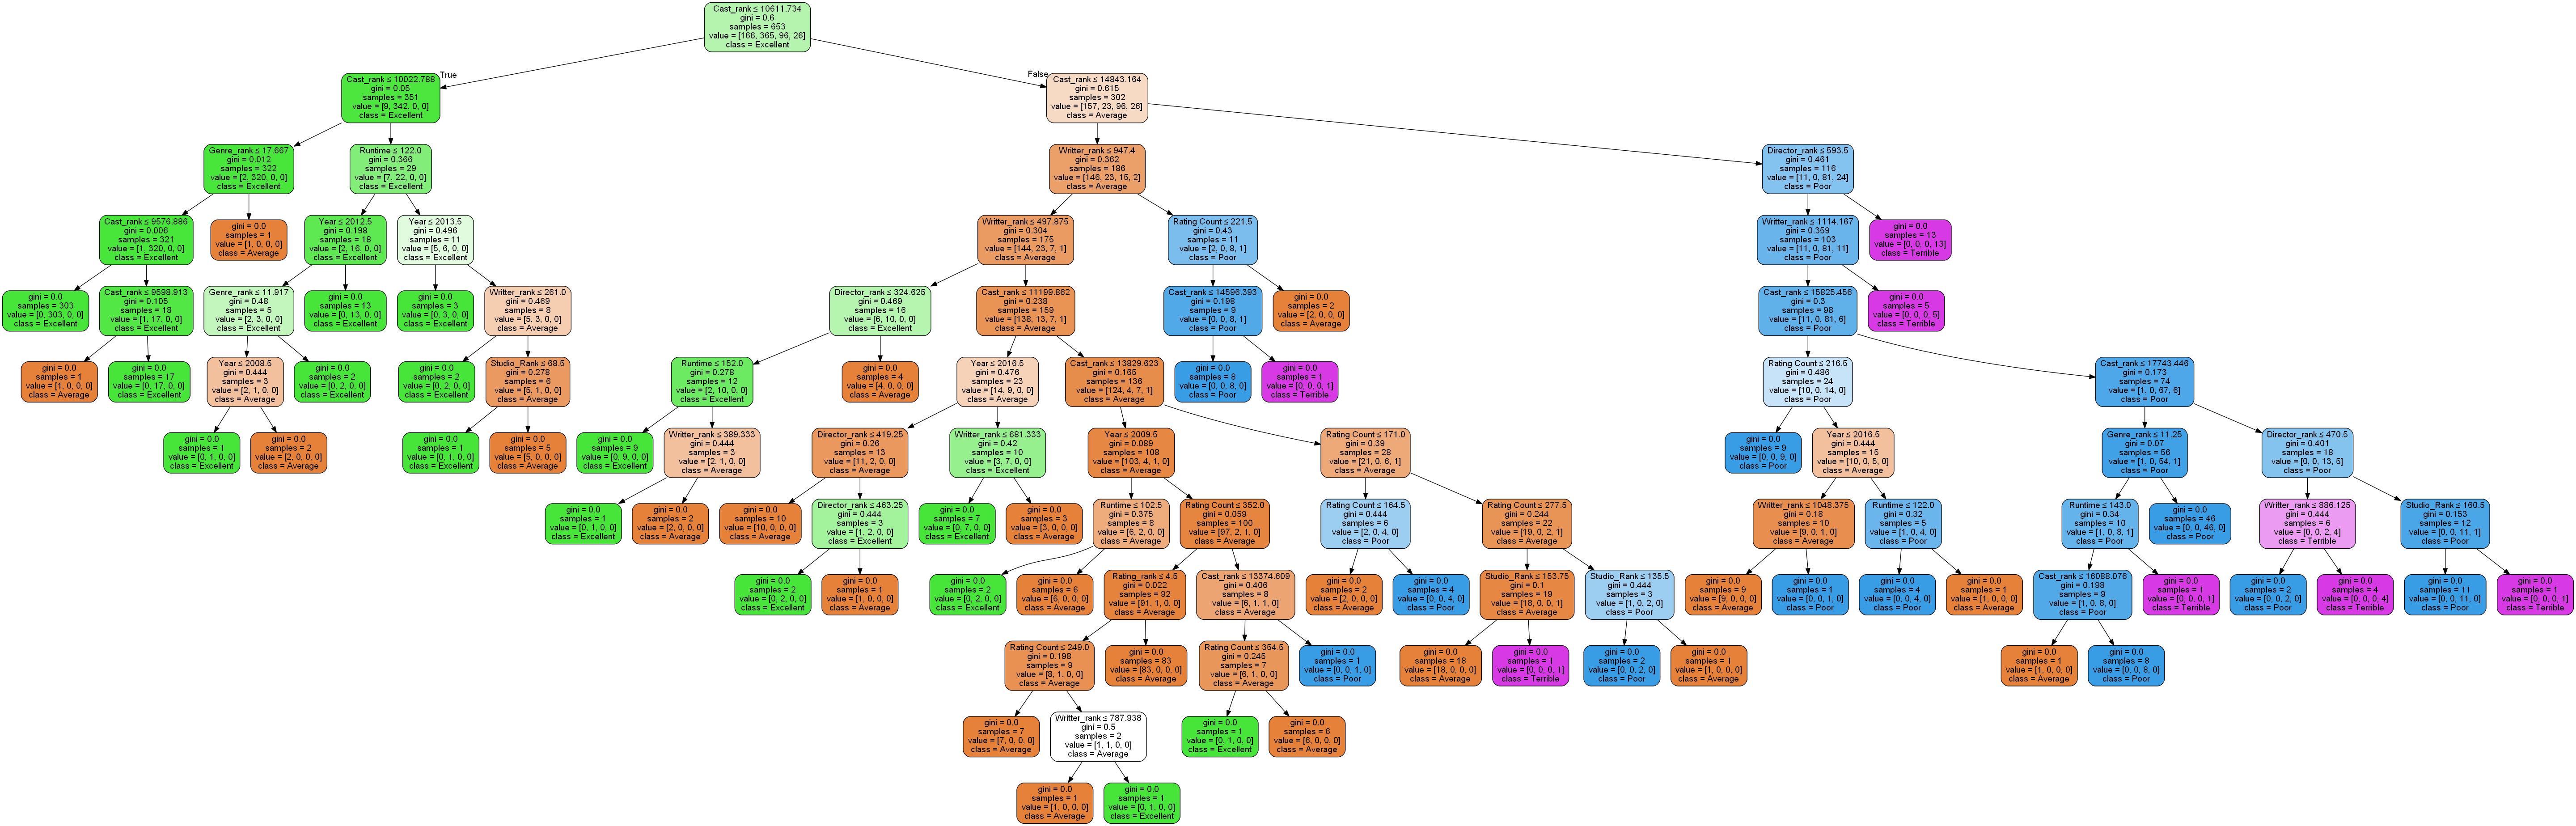

In [194]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('MovieRating.png')
Image(graph.create_png())

In [195]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),", Test accuracy:", model.score(X_test, y_test))
print()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Train accuracy: 0.9019908116385911 , Test accuracy: 0.8714285714285714

              precision    recall  f1-score   support

     Average       0.81      0.79      0.80        72
   Excellent       0.97      0.92      0.95       156
        Poor       0.69      0.93      0.79        41
    Terrible       0.71      0.45      0.56        11

    accuracy                           0.87       280
   macro avg       0.80      0.77      0.77       280
weighted avg       0.88      0.87      0.87       280



In [197]:
import pydot

In [198]:
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("DT_MovieRating.png") # saved in the following file

Cast_rank : 0.8968788298870459
Director_rank : 0.057671341727336026
Writter_rank : 0.032879483194789824
Genre_rank : 0.006933986834917614
Runtime : 0.00563635835591063
Year : 0.0
Studio_Rank : 0.0
Rating_rank : 0.0
Rating Count : 0.0


In [199]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

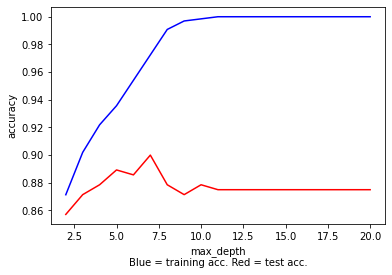

In [200]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [201]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8836140888208269
Test accuracy: 0.8678571428571429
              precision    recall  f1-score   support

     Average       0.87      0.67      0.76        72
   Excellent       0.95      0.96      0.96       156
        Poor       0.67      0.88      0.76        41
    Terrible       0.69      0.82      0.75        11

    accuracy                           0.87       280
   macro avg       0.80      0.83      0.80       280
weighted avg       0.88      0.87      0.87       280

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 20}


In [202]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(45, 56)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8713629402756509
Test accuracy: 0.8571428571428571
              precision    recall  f1-score   support

     Average       0.79      0.81      0.80        72
   Excellent       0.97      0.92      0.95       156
        Poor       0.64      0.93      0.76        41
    Terrible       0.00      0.00      0.00        11

    accuracy                           0.86       280
   macro avg       0.60      0.66      0.63       280
weighted avg       0.84      0.86      0.84       280

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 45}


C:\Users\dsu.jianwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [205]:
# do the feature importance and visualization analysis on GridSearchCV's best model

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "lab2_optimize_d_tree.png")

Cast_rank : 1.0
Year : 0.0
Studio_Rank : 0.0
Genre_rank : 0.0
Writter_rank : 0.0
Director_rank : 0.0
Rating_rank : 0.0
Runtime : 0.0
Rating Count : 0.0


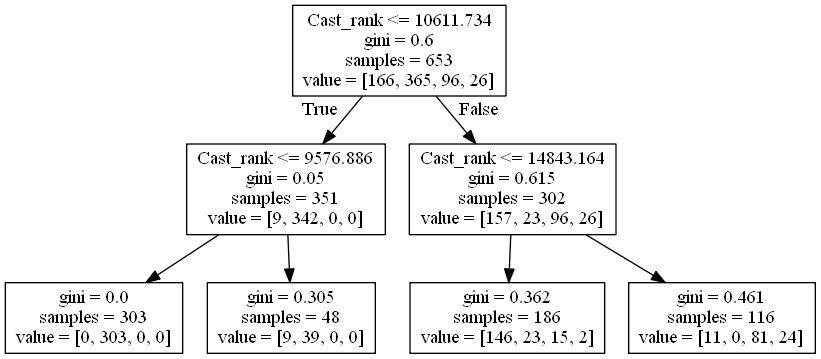

In [206]:
#Visualise the structure of your decision tree. 
from IPython.display import Image
Image(filename='lab2_optimize_d_tree.png')

In [207]:
critics_review_table

,Movie ID,Critic ID,5 points score,Rating Score,Review,Date
0,M596,C0,4/5,88%,Shirley unquestionably does its subject justic...,"Mar 2, 2020"
1,M552,C0,5/5,99%,With a narrative that is both universal and de...,"Mar 2, 2020"
2,M880,C0,3/5,91%,"With a set up as large as this, Bacurau would ...","Jul 8, 2019"
3,M874,C0,4/5,99%,"The film is a precious time capsule, preservin...","Feb 19, 2019"
4,M536,C1,NaN,99%,an excellent opportunity to look at the past a...,"Jul 29, 2019"
...,...,...,...,...,...,...
198296,M853,C2527,4/5,79%,The whole truth and mostly just the truth,"Dec 31, 2009"
198297,M675,C2527,3/5,91%,"Much splat, little art","Jul 23, 2009"
198298,M854,C2527,3/5,98%,The best thing about director Darren Aronofsky...,"Feb 24, 2009"
198299,M509,C2527,5/5,91%,... this production could well be billed as th...,"Jan 28, 2009"


In [210]:
len(critics_review_table["Critic ID"].unique())

2528

In [211]:
critics_review_table_tmp = critics_review_table.copy()

In [212]:
critics_review_table_tmp.sort_values(["Critic ID",'Date'])

,Movie ID,Critic ID,5 points score,Rating Score,Review,Date
3,M874,C0,4/5,99%,"The film is a precious time capsule, preservin...","Feb 19, 2019"
2,M880,C0,3/5,91%,"With a set up as large as this, Bacurau would ...","Jul 8, 2019"
0,M596,C0,4/5,88%,Shirley unquestionably does its subject justic...,"Mar 2, 2020"
1,M552,C0,5/5,99%,With a narrative that is both universal and de...,"Mar 2, 2020"
4,M536,C1,NaN,99%,an excellent opportunity to look at the past a...,"Jul 29, 2019"
...,...,...,...,...,...,...
73532,M273,C998,NaN,90%,Mandy isn't for everyone. But for those it is ...,"Sep 13, 2018"
73541,M71,C998,NaN,69%,Is it a far,"Sep 15, 2017"
73520,M47,C998,NaN,84%,"If Ad Astra doesn't quite get there, it's not ...","Sep 16, 2019"
73542,M84,C998,NaN,85%,"For a movie with so much blood, It feels disap...","Sep 6, 2017"


In [213]:
records = []
for i in critics_review_table["Critic ID"].unique():
    records.append(list(critics_review_table[critics_review_table["Critic ID"]==i]["Movie ID"]))

In [214]:
len(records)

2528

In [215]:
records

[['M596', 'M552', 'M880', 'M874'],
 ['M536'],
 ['M31',
  'M15',
  'M10',
  'M3',
  'M368',
  'M30',
  'M4',
  'M35',
  'M40',
  'M90',
  'M94',
  'M29',
  'M80',
  'M38',
  'M13',
  'M7',
  'M106',
  'M53',
  'M36',
  'M618',
  'M58',
  'M20',
  'M364',
  'M49',
  'M88',
  'M578',
  'M99',
  'M448',
  'M338',
  'M538',
  'M923',
  'M66',
  'M70',
  'M189',
  'M997',
  'M703',
  'M804',
  'M297',
  'M511',
  'M434',
  'M922',
  'M904',
  'M283',
  'M137',
  'M129',
  'M301'],
 ['M505'],
 ['M378', 'M93'],
 ['M930',
  'M285',
  'M119',
  'M426',
  'M664',
  'M340',
  'M76',
  'M441',
  'M455',
  'M981',
  'M68',
  'M515',
  'M171',
  'M6',
  'M239',
  'M435',
  'M150',
  'M734',
  'M164',
  'M73',
  'M413',
  'M180',
  'M125',
  'M78',
  'M25'],
 ['M426',
  'M366',
  'M318',
  'M60',
  'M209',
  'M91',
  'M10',
  'M57',
  'M705',
  'M162',
  'M415',
  'M787',
  'M913',
  'M283',
  'M905',
  'M997',
  'M3',
  'M807',
  'M567',
  'M275',
  'M493',
  'M295',
  'M816',
  'M121',
  'M805',
  '

In [217]:
from apyori import apriori
association_rules = apriori(records, min_support=0.05, min_confidence=0.0, min_lift=0.0, min_length=1)
association_results = list(association_rules)

In [218]:
results = pd.DataFrame(association_results)

In [219]:
results

,items,support,ordered_statistics
0,(M0),0.208861,"[((), (M0), 0.2088607594936709, 1.0)]"
1,(M1),0.201345,"[((), (M1), 0.20134493670886075, 1.0)]"
2,(M10),0.164557,"[((), (M10), 0.16455696202531644, 1.0)]"
3,(M100),0.119858,"[((), (M100), 0.11985759493670886, 1.0)]"
4,(M101),0.119858,"[((), (M101), 0.11985759493670886, 1.0)]"
...,...,...,...
72546,"(M7, M13, M3, M4, M36, M53)",0.050633,"[((), (M7, M36, M3, M13, M4, M53), 0.050632911..."
72547,"(M7, M13, M3, M4, M8, M36)",0.051424,"[((), (M7, M36, M3, M13, M4, M8), 0.0514240506..."
72548,"(M7, M13, M3, M4, M8, M5)",0.051028,"[((), (M5, M7, M3, M13, M4, M8), 0.05102848101..."
72549,"(M7, M3, M4, M8, M26, M28)",0.051028,"[((), (M28, M7, M3, M4, M8, M26), 0.0510284810..."


In [220]:
def preprocess_lift(i):
    lift = i[0].lift
    return lift
def preprocess_confidence(i):
    confidence = i[0].confidence
    return confidence

In [221]:
results['Lift'] = results['ordered_statistics'].apply(preprocess_lift)
results['Confidence'] = results['ordered_statistics'].apply(preprocess_confidence)
results = results[['items','support','Lift','Confidence']]

In [225]:
final_result = results.sort_values(by=['support'],ascending=False).reset_index()

In [228]:
final_result.head(5)

,index,items,support,Lift,Confidence
0,0,(M0),0.208861,1.0,0.208861
1,1,(M1),0.201345,1.0,0.201345
2,112,(M2),0.190269,1.0,0.190269
3,223,(M3),0.187500,1.0,0.187500
4,334,(M4),0.184335,1.0,0.184335
